# Task

Create a convolutional neural network to process the MNIST dataset.

Compare it with a neural network with fully connected layers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and display data

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Display data shapes
print(f"Training data shape: X={X_train.shape}, Y={Y_train.shape}")
print(f"Test data shape: X={X_test.shape}, Y={Y_test.shape}")
print(f"\nUnique labels in training set: {np.unique(Y_train)}")
print(f"Unique labels in test set: {np.unique(Y_test)}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: X=(60000, 28, 28), Y=(60000,)
Test data shape: X=(10000, 28, 28), Y=(10000,)

Unique labels in training set: [0 1 2 3 4 5 6 7 8 9]
Unique labels in test set: [0 1 2 3 4 5 6 7 8 9]


Reminder that values take on shades of grey 0 - 255
* 0 is black
* 255 is white

In [3]:
img = X_train[0]
print (f"min:{np.amin(X_train[0])} max:{np.amax(X_train[0])}")

min:0 max:255


In [4]:
def show_images (images, labels, rows=6, cols=10):
    fig, axes = plt.subplots(rows, cols, figsize=(cols, rows))
    for idx in range (0, rows * cols):
        ridx=idx // cols
        cidx=idx % cols
        ax= axes[ridx, cidx]
        ax.axis("off")
        ax.imshow(images[idx], cmap="gray_r")
        ax.set_title(f"{labels[idx]}")
    plt.show()    

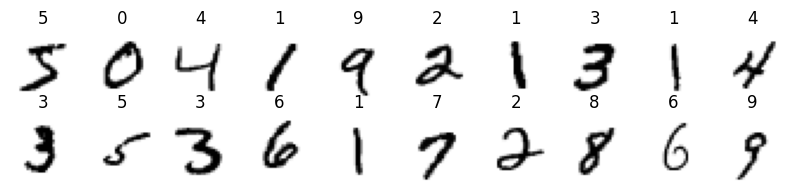

In [5]:
show_images(X_train, Y_train, 2, 10)

# Data preparation

Standardization of values from range 0 - 255 to range 0 - 1

In [6]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

Binary encoding

In [7]:
from tensorflow.keras.utils import to_categorical 
Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

print(f"Y_train shape after encoding: {Y_train.shape}")
print(f"Y_test shape after encoding: {Y_test.shape}")
print(f"\nFirst encoded label: {Y_train[0]}")

Y_train shape after encoding: (60000, 10)
Y_test shape after encoding: (10000, 10)

First encoded label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Neural network

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import time

In [9]:
# Prepare data for CNN (add channel dimension)
X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 1)

print(f"CNN Training data shape: {X_train_cnn.shape}")
print(f"CNN Test data shape: {X_test_cnn.shape}")

# Prepare data for Fully Connected model (flatten)
X_train_fc = X_train.reshape(X_train.shape[0], 28 * 28)
X_test_fc = X_test.reshape(X_test.shape[0], 28 * 28)

print(f"\nFC Training data shape: {X_train_fc.shape}")
print(f"FC Test data shape: {X_test_fc.shape}")

CNN Training data shape: (60000, 28, 28, 1)
CNN Test data shape: (10000, 28, 28, 1)

FC Training data shape: (60000, 784)
FC Test data shape: (10000, 784)


In [11]:
# ============================================
# CNN Model (Convolutional Neural Network)
# ============================================

print("Creating CNN Model...")
model_cnn = Sequential()

# Input layer
model_cnn.add(Input(shape=(28, 28, 1)))

# First convolutional block
model_cnn.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model_cnn.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))

# Second convolutional block
model_cnn.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_cnn.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))

# Flatten layer
model_cnn.add(Flatten())

# Fully connected layers
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))

# Output layer
model_cnn.add(Dense(10, activation='softmax'))

# Compile the model
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
print("\nCNN Model Summary:")
model_cnn.summary()

# Train CNN model
print("\nTraining CNN Model...")
early_stop_cnn = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

start_time_cnn = time.time()
history_cnn = model_cnn.fit(
    X_train_cnn, Y_train,
    validation_data=(X_test_cnn, Y_test),
    batch_size=128,
    epochs=20,
    callbacks=[early_stop_cnn],
    verbose=1
)
training_time_cnn = time.time() - start_time_cnn

print(f"\nCNN Training completed in {training_time_cnn:.2f} seconds")

# Save CNN model
model_cnn.save('classification_model_mnist_cnn.keras')
print("CNN model saved as 'classification_model_mnist_cnn.keras'")

Creating CNN Model...

CNN Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 467,818 (1.78 MB)

 Trainable params: 467,818 (1.78 MB)

 Non-trainable params: 0 (0.00 B)


Training CNN Model...
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.9141 - loss: 0.2794 - val_accuracy: 0.9847 - val_loss: 0.0456
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.9754 - loss: 0.0862 - val_accuracy: 0.9888 - val_loss: 0.0307
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9807 - loss: 0.0658 - val_accuracy: 0.9915 - val_loss: 0.0257
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9844 - loss: 0.0533 - val_accuracy: 0.9921 - val_loss: 0.0247
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9862 - loss: 0.0466 - val_accuracy: 0.9928 - val_loss: 0.0204
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.9881 - loss: 0.0394 - val_accuracy: 0.9941 - val_loss: 0.0178
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.9895 - loss: 0.0355 - val_accuracy: 0.9936 - val_loss: 0.0199
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0

In [12]:
# ============================================
# Fully Connected Model (Dense layers only)
# ============================================

print("Creating Fully Connected Model...")
model_fc = Sequential()

# Input layer
model_fc.add(Input(shape=(28 * 28,)))

# First hidden layer
model_fc.add(Dense(512, activation='relu'))
model_fc.add(Dropout(0.5))

# Second hidden layer
model_fc.add(Dense(256, activation='relu'))
model_fc.add(Dropout(0.5))

# Third hidden layer
model_fc.add(Dense(128, activation='relu'))
model_fc.add(Dropout(0.5))

# Output layer
model_fc.add(Dense(10, activation='softmax'))

# Compile the model
model_fc.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
print("\nFully Connected Model Summary:")
model_fc.summary()

# Train Fully Connected model
print("\nTraining Fully Connected Model...")
early_stop_fc = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

start_time_fc = time.time()
history_fc = model_fc.fit(
    X_train_fc, Y_train,
    validation_data=(X_test_fc, Y_test),
    batch_size=128,
    epochs=20,
    callbacks=[early_stop_fc],
    verbose=1
)
training_time_fc = time.time() - start_time_fc

print(f"\nFully Connected Training completed in {training_time_fc:.2f} seconds")

# Save Fully Connected model
model_fc.save('classification_model_mnist_fc.keras')
print("Fully Connected model saved as 'classification_model_mnist_fc.keras'")


Creating Fully Connected Model...

Fully Connected Model Summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)


Training Fully Connected Model...
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8317 - loss: 0.5427 - val_accuracy: 0.9526 - val_loss: 0.1575
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9384 - loss: 0.2252 - val_accuracy: 0.9631 - val_loss: 0.1222
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9513 - loss: 0.1768 - val_accuracy: 0.9709 - val_loss: 0.0999
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9585 - loss: 0.1501 - val_accuracy: 0.9746 - val_loss: 0.0861
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9629 - loss: 0.1334 - val_accuracy: 0.9754 - val_loss: 0.0830
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9661 - loss: 0.1241 - val_accuracy: 0.9770 - val_loss: 0.0804
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9690 - loss: 0.1097 - val_accuracy: 0.9765 - val_loss: 0.0787
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.97

# History of learning model
# Show learning curve
# Show model accuracy curve
# Describe the shapes

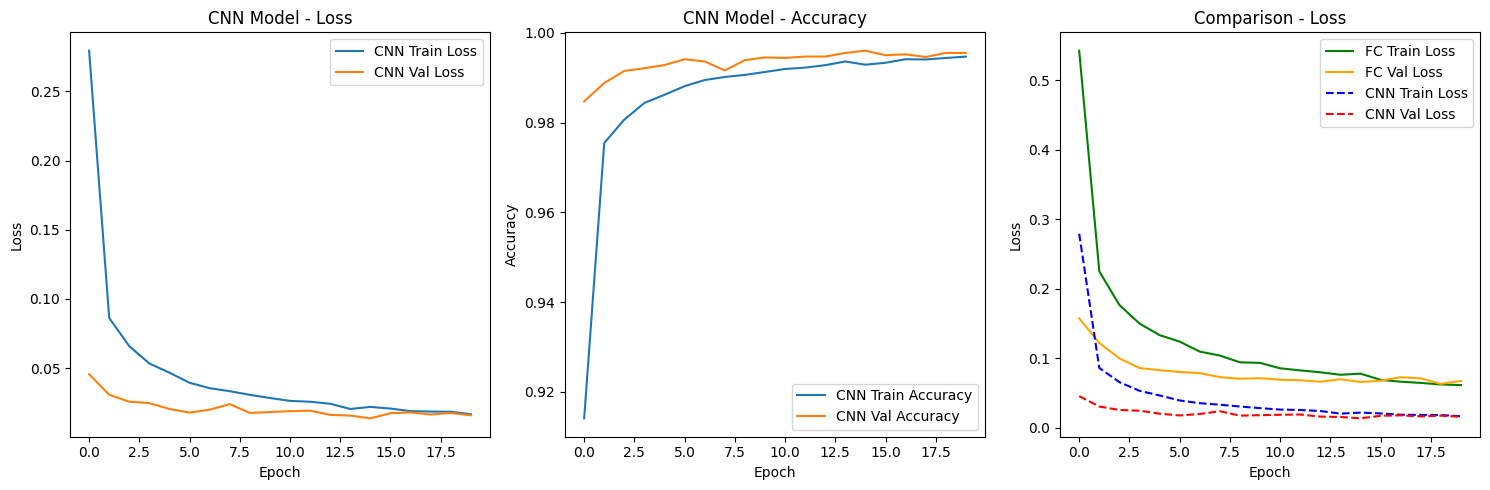

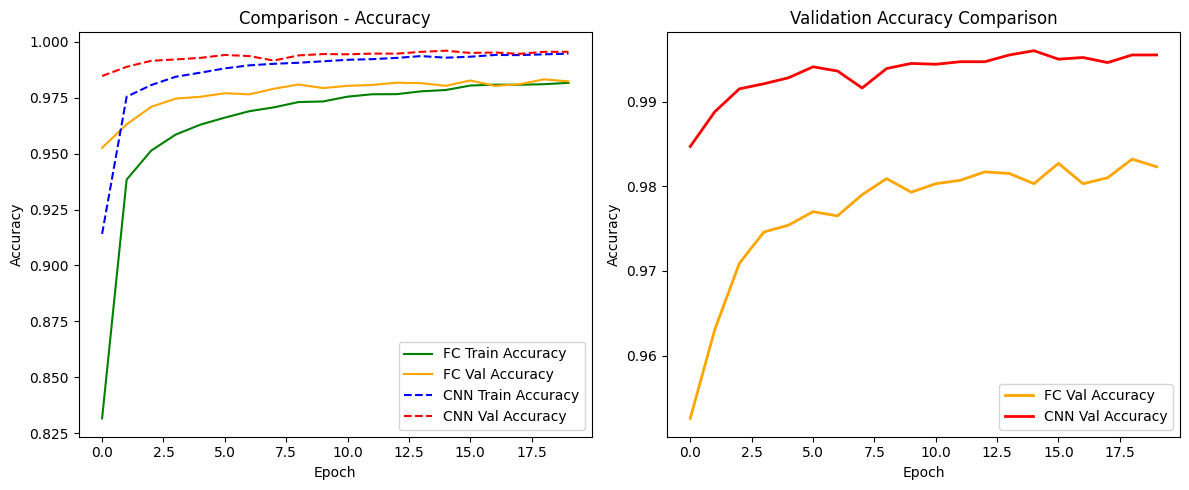

CNN Model:
  Training epochs: 20
  Final train loss: 0.0166
  Final train accuracy: 0.9947
  Final val loss: 0.0159
  Final val accuracy: 0.9955

Fully Connected Model:
  Training epochs: 20
  Final train loss: 0.0615
  Final train accuracy: 0.9816
  Final val loss: 0.0674
  Final val accuracy: 0.9823


In [13]:
# Plot learning history for CNN model
plt.figure(figsize=(15, 5))

# CNN Loss
plt.subplot(1, 3, 1)
plt.plot(history_cnn.history['loss'], label='CNN Train Loss')
plt.plot(history_cnn.history['val_loss'], label='CNN Val Loss')
plt.legend()
plt.title('CNN Model - Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

# CNN Accuracy
plt.subplot(1, 3, 2)
plt.plot(history_cnn.history['accuracy'], label='CNN Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Val Accuracy')
plt.legend()
plt.title('CNN Model - Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# Fully Connected Loss
plt.subplot(1, 3, 3)
plt.plot(history_fc.history['loss'], label='FC Train Loss', color='green')
plt.plot(history_fc.history['val_loss'], label='FC Val Loss', color='orange')
plt.plot(history_cnn.history['loss'], label='CNN Train Loss', color='blue', linestyle='--')
plt.plot(history_cnn.history['val_loss'], label='CNN Val Loss', color='red', linestyle='--')
plt.legend()
plt.title('Comparison - Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.tight_layout()
plt.show()

# Plot accuracy comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_fc.history['accuracy'], label='FC Train Accuracy', color='green')
plt.plot(history_fc.history['val_accuracy'], label='FC Val Accuracy', color='orange')
plt.plot(history_cnn.history['accuracy'], label='CNN Train Accuracy', color='blue', linestyle='--')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Val Accuracy', color='red', linestyle='--')
plt.legend()
plt.title('Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(history_fc.history['val_accuracy'], label='FC Val Accuracy', color='orange', linewidth=2)
plt.plot(history_cnn.history['val_accuracy'], label='CNN Val Accuracy', color='red', linewidth=2)
plt.legend()
plt.title('Validation Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.tight_layout()
plt.show()

# Describe shapes
print("CNN Model:")
print(f"  Training epochs: {len(history_cnn.history['loss'])}")
print(f"  Final train loss: {history_cnn.history['loss'][-1]:.4f}")
print(f"  Final train accuracy: {history_cnn.history['accuracy'][-1]:.4f}")
print(f"  Final val loss: {history_cnn.history['val_loss'][-1]:.4f}")
print(f"  Final val accuracy: {history_cnn.history['val_accuracy'][-1]:.4f}")

print("\nFully Connected Model:")
print(f"  Training epochs: {len(history_fc.history['loss'])}")
print(f"  Final train loss: {history_fc.history['loss'][-1]:.4f}")
print(f"  Final train accuracy: {history_fc.history['accuracy'][-1]:.4f}")
print(f"  Final val loss: {history_fc.history['val_loss'][-1]:.4f}")
print(f"  Final val accuracy: {history_fc.history['val_accuracy'][-1]:.4f}")


# Model Verification
# R2 score
# Accuracy of the model as a whole
# Accuracy across classes
# Confusion matrix
# Examples of misclassification

CNN Model Verification

R2 Score: 0.9922
Test Loss: 0.0137
Test Accuracy: 0.9960

Accuracy per class (CNN):
  Class 0: 0.9980 (978/980)
  Class 1: 0.9991 (1134/1135)
  Class 2: 0.9971 (1029/1032)
  Class 3: 0.9970 (1007/1010)
  Class 4: 0.9939 (976/982)
  Class 5: 0.9955 (888/892)
  Class 6: 0.9927 (951/958)
  Class 7: 0.9961 (1024/1028)
  Class 8: 0.9959 (970/974)
  Class 9: 0.9941 (1003/1009)

Confusion Matrix (CNN):
[[ 978    0    0    0    0    0    1    1    0    0]
 [   0 1134    0    0    0    0    1    0    0    0]
 [   1    1 1029    0    0    0    0    1    0    0]
 [   0    0    0 1007    0    2    0    0    1    0]
 [   0    0    1    0  976    0    1    0    0    4]
 [   0    0    0    3    0  888    1    0    0    0]
 [   1    2    0    0    1    1  951    0    2    0]
 [   0    1    0    0    0    0    0 1024    1    2]
 [   0    0    2    0    0    1    0    0  970    1]
 [   0    0    0    1    4    0    0    0    1 1003]]


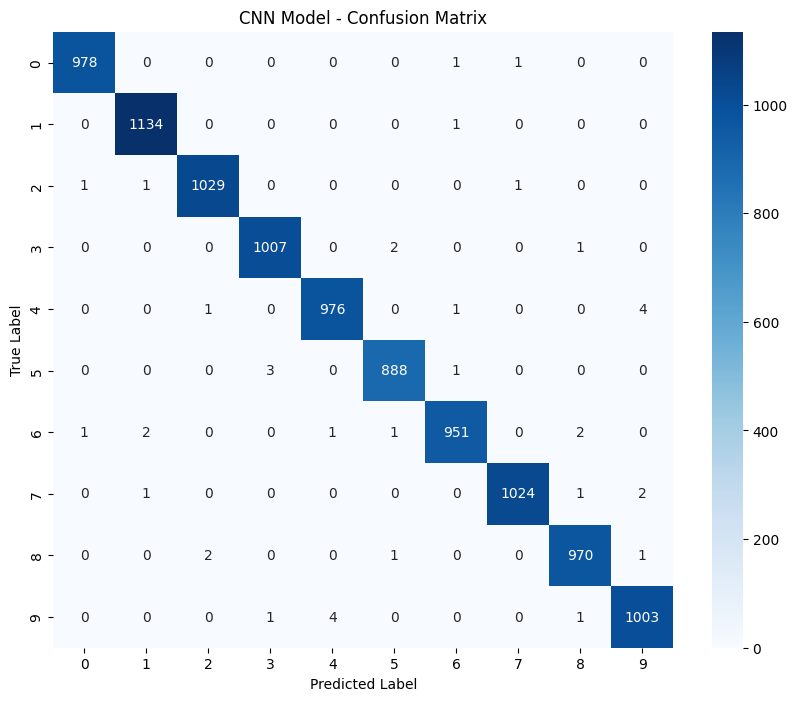

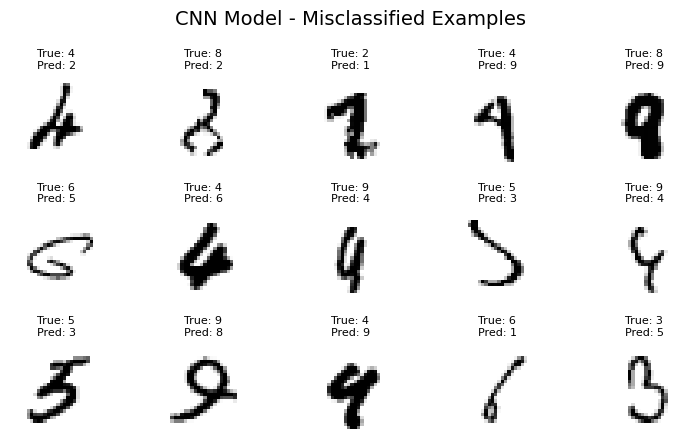


CNN Model: Total misclassifications: 40 out of 10000


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score

# ============================================
# CNN Model Verification
# ============================================
print("="*60)
print("CNN Model Verification")
print("="*60)

# Predictions
Y_pred_cnn = model_cnn.predict(X_test_cnn, verbose=0)
Y_pred_cnn_classes = np.argmax(Y_pred_cnn, axis=1)
Y_test_classes = np.argmax(Y_test, axis=1)

# R2 score
r2_cnn = r2_score(Y_test_classes, Y_pred_cnn_classes)
print(f"\nR2 Score: {r2_cnn:.4f}")

# Overall accuracy
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(X_test_cnn, Y_test, verbose=0)
print(f"Test Loss: {test_loss_cnn:.4f}")
print(f"Test Accuracy: {test_acc_cnn:.4f}")

# Accuracy per class
class_correct_cnn = [0] * 10
class_count = [0] * 10

for i in range(len(Y_test_classes)):
    class_count[Y_test_classes[i]] += 1
    if Y_test_classes[i] == Y_pred_cnn_classes[i]:
        class_correct_cnn[Y_test_classes[i]] += 1

print("\nAccuracy per class (CNN):")
for i in range(10):
    acc = class_correct_cnn[i] / class_count[i] if class_count[i] > 0 else 0
    print(f"  Class {i}: {acc:.4f} ({class_correct_cnn[i]}/{class_count[i]})")

# Confusion matrix
cm_cnn = confusion_matrix(Y_test_classes, Y_pred_cnn_classes)
print("\nConfusion Matrix (CNN):")
print(cm_cnn)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues')
plt.title('CNN Model - Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Examples of misclassification
def show_misclassifications(X_data, Y_true, Y_pred, model_name, rows=3, cols=5):
    misclassified = []
    for i in range(len(Y_true)):
        if Y_true[i] != Y_pred[i]:
            misclassified.append(i)
    
    if len(misclassified) == 0:
        print(f"\n{model_name}: No misclassifications found!")
        return
    
    max_examples = min(rows * cols, len(misclassified))
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 1.5, rows * 1.5))
    
    for idx in range(max_examples):
        ridx = idx // cols
        cidx = idx % cols
        ax = axes[ridx, cidx] if rows > 1 else axes[cidx]
        
        img_idx = misclassified[idx]
        if X_data.ndim == 4:  # CNN format (28, 28, 1)
            ax.imshow(X_data[img_idx].reshape(28, 28), cmap='gray_r')
        else:  # FC format (784,)
            ax.imshow(X_data[img_idx].reshape(28, 28), cmap='gray_r')
        
        ax.axis('off')
        ax.set_title(f'True: {Y_true[img_idx]}\nPred: {Y_pred[img_idx]}', fontsize=8)
    
    # Hide unused subplots
    for idx in range(max_examples, rows * cols):
        ridx = idx // cols
        cidx = idx % cols
        ax = axes[ridx, cidx] if rows > 1 else axes[cidx]
        ax.axis('off')
    
    plt.suptitle(f'{model_name} - Misclassified Examples', fontsize=14)
    plt.tight_layout()
    plt.show()
    
    print(f"\n{model_name}: Total misclassifications: {len(misclassified)} out of {len(Y_true)}")

show_misclassifications(X_test_cnn, Y_test_classes, Y_pred_cnn_classes, "CNN Model")



Fully Connected Model Verification

R2 Score: 0.9601
Test Loss: 0.0632
Test Accuracy: 0.9832

Accuracy per class (Fully Connected):
  Class 0: 0.9929 (973/980)
  Class 1: 0.9903 (1124/1135)
  Class 2: 0.9855 (1017/1032)
  Class 3: 0.9842 (994/1010)
  Class 4: 0.9817 (964/982)
  Class 5: 0.9809 (875/892)
  Class 6: 0.9823 (941/958)
  Class 7: 0.9815 (1009/1028)
  Class 8: 0.9754 (950/974)
  Class 9: 0.9762 (985/1009)

Confusion Matrix (Fully Connected):
[[ 973    1    1    1    0    1    1    1    1    0]
 [   0 1124    3    1    0    2    2    0    3    0]
 [   2    0 1017    4    1    0    0    4    4    0]
 [   0    0    2  994    0    4    0    5    3    2]
 [   0    0    3    0  964    0    5    0    1    9]
 [   2    0    0    3    1  875    4    1    4    2]
 [   5    2    0    0    4    5  941    0    1    0]
 [   1    2    9    1    0    0    0 1009    0    6]
 [   4    2    2    2    2    5    0    2  950    5]
 [   4    2    0    5    6    0    0    5    2  985]]


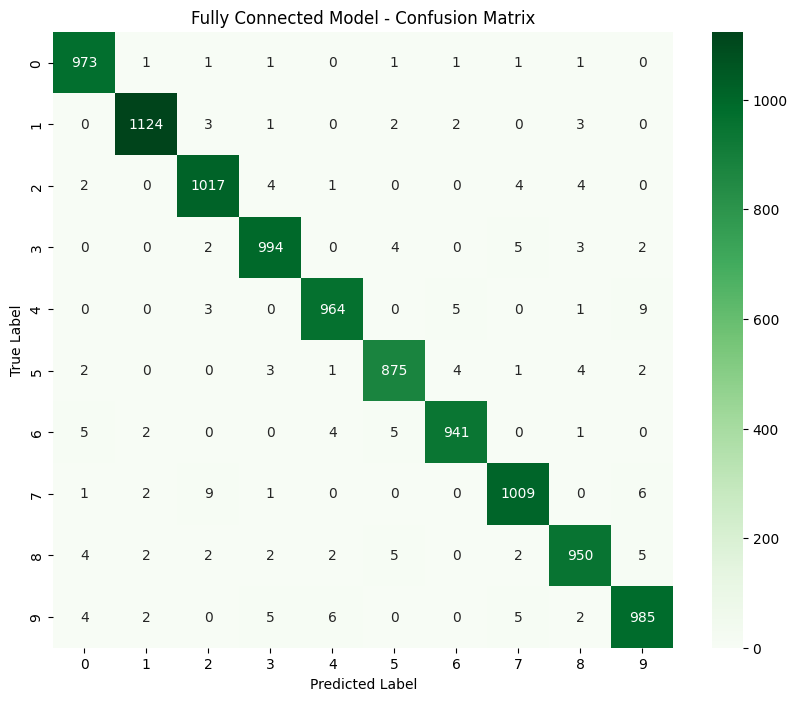

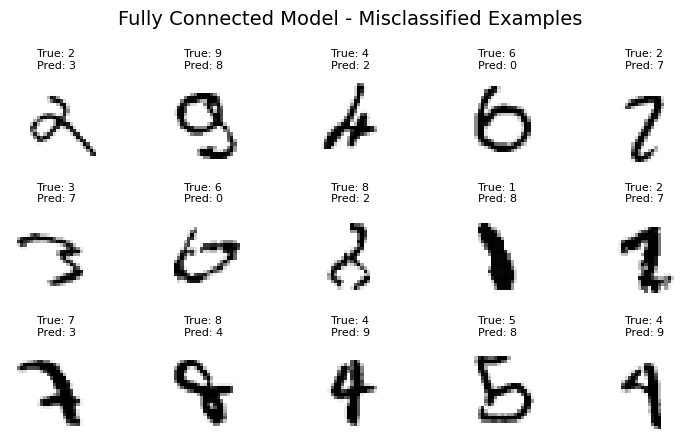


Fully Connected Model: Total misclassifications: 168 out of 10000


In [15]:
# ============================================
# Fully Connected Model Verification
# ============================================
print("\n" + "="*60)
print("Fully Connected Model Verification")
print("="*60)

# Predictions
Y_pred_fc = model_fc.predict(X_test_fc, verbose=0)
Y_pred_fc_classes = np.argmax(Y_pred_fc, axis=1)

# R2 score
r2_fc = r2_score(Y_test_classes, Y_pred_fc_classes)
print(f"\nR2 Score: {r2_fc:.4f}")

# Overall accuracy
test_loss_fc, test_acc_fc = model_fc.evaluate(X_test_fc, Y_test, verbose=0)
print(f"Test Loss: {test_loss_fc:.4f}")
print(f"Test Accuracy: {test_acc_fc:.4f}")

# Accuracy per class
class_correct_fc = [0] * 10

for i in range(len(Y_test_classes)):
    if Y_test_classes[i] == Y_pred_fc_classes[i]:
        class_correct_fc[Y_test_classes[i]] += 1

print("\nAccuracy per class (Fully Connected):")
for i in range(10):
    acc = class_correct_fc[i] / class_count[i] if class_count[i] > 0 else 0
    print(f"  Class {i}: {acc:.4f} ({class_correct_fc[i]}/{class_count[i]})")

# Confusion matrix
cm_fc = confusion_matrix(Y_test_classes, Y_pred_fc_classes)
print("\nConfusion Matrix (Fully Connected):")
print(cm_fc)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fc, annot=True, fmt='d', cmap='Greens')
plt.title('Fully Connected Model - Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Examples of misclassification
show_misclassifications(X_test_fc, Y_test_classes, Y_pred_fc_classes, "Fully Connected Model")


# Model Comparison
# Which model is more accurate
# How about the learning time
# How about the time of inference

MODEL COMPARISON

1. ACCURACY COMPARISON:
   CNN Model:              0.9960 (99.60%)
   Fully Connected Model:  0.9832 (98.32%)
   → CNN model is more accurate by 1.28%

2. LEARNING TIME COMPARISON:
   CNN Model:              357.64 seconds (5.96 minutes)
   Fully Connected Model:  82.25 seconds (1.37 minutes)
   → Fully Connected model trained 4.35x faster

3. INFERENCE TIME COMPARISON:
   CNN Model (1000 samples):
     Total time: 0.2913 seconds
     Per sample: 0.2913 milliseconds
   Fully Connected Model (1000 samples):
     Total time: 0.1343 seconds
     Per sample: 0.1343 milliseconds
   → Fully Connected model is 2.17x faster for inference

4. R2 SCORE COMPARISON:
   CNN Model:              0.9922
   Fully Connected Model:  0.9601

5. MODEL SIZE COMPARISON:
   CNN Model:              5.41 MB
   Fully Connected Model:  6.53 MB


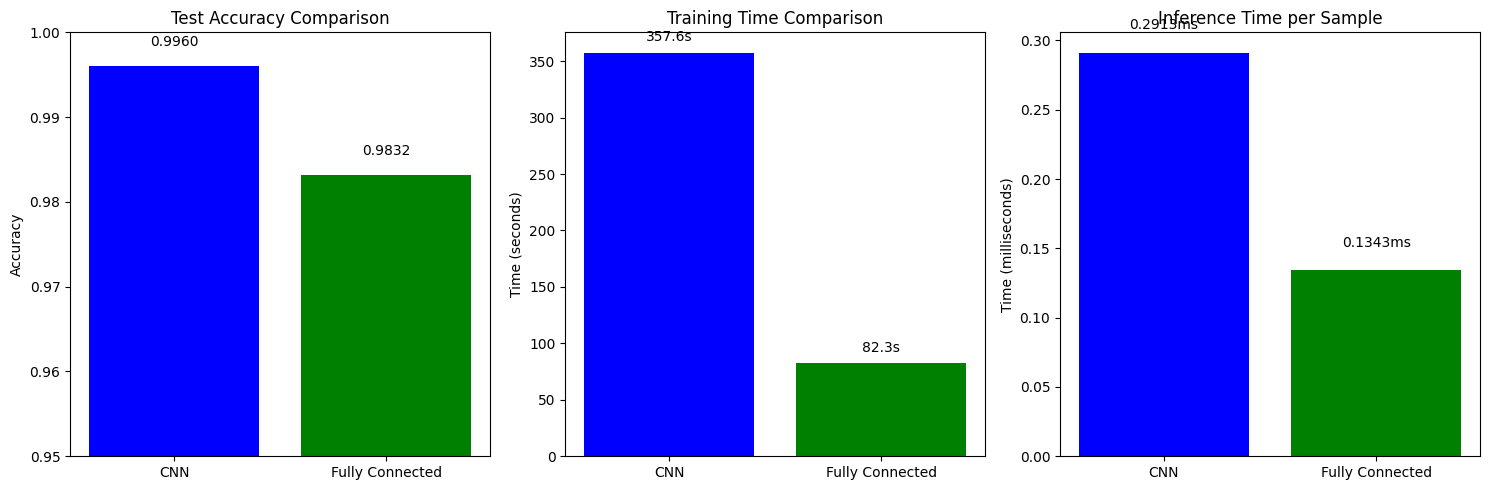


SUMMARY:
Best Accuracy: CNN (0.9960)
Fastest Training: Fully Connected (82.25s)
Fastest Inference: Fully Connected (0.1343ms per sample)


In [16]:
# ============================================
# Model Comparison
# ============================================

print("="*60)
print("MODEL COMPARISON")
print("="*60)

# 1. Accuracy Comparison
print("\n1. ACCURACY COMPARISON:")
print(f"   CNN Model:              {test_acc_cnn:.4f} ({test_acc_cnn*100:.2f}%)")
print(f"   Fully Connected Model:  {test_acc_fc:.4f} ({test_acc_fc*100:.2f}%)")
if test_acc_cnn > test_acc_fc:
    print(f"   → CNN model is more accurate by {((test_acc_cnn - test_acc_fc) * 100):.2f}%")
elif test_acc_fc > test_acc_cnn:
    print(f"   → Fully Connected model is more accurate by {((test_acc_fc - test_acc_cnn) * 100):.2f}%")
else:
    print("   → Both models have the same accuracy")

# 2. Learning Time Comparison
print("\n2. LEARNING TIME COMPARISON:")
print(f"   CNN Model:              {training_time_cnn:.2f} seconds ({training_time_cnn/60:.2f} minutes)")
print(f"   Fully Connected Model:  {training_time_fc:.2f} seconds ({training_time_fc/60:.2f} minutes)")
if training_time_cnn < training_time_fc:
    print(f"   → CNN model trained {training_time_fc/training_time_cnn:.2f}x faster")
elif training_time_fc < training_time_cnn:
    print(f"   → Fully Connected model trained {training_time_cnn/training_time_fc:.2f}x faster")
else:
    print("   → Both models took the same time to train")

# 3. Inference Time Comparison
print("\n3. INFERENCE TIME COMPARISON:")

# CNN inference time
start_time = time.time()
_ = model_cnn.predict(X_test_cnn[:1000], verbose=0)
inference_time_cnn = time.time() - start_time
inference_time_cnn_per_sample = inference_time_cnn / 1000

# FC inference time
start_time = time.time()
_ = model_fc.predict(X_test_fc[:1000], verbose=0)
inference_time_fc = time.time() - start_time
inference_time_fc_per_sample = inference_time_fc / 1000

print(f"   CNN Model (1000 samples):")
print(f"     Total time: {inference_time_cnn:.4f} seconds")
print(f"     Per sample: {inference_time_cnn_per_sample*1000:.4f} milliseconds")
print(f"   Fully Connected Model (1000 samples):")
print(f"     Total time: {inference_time_fc:.4f} seconds")
print(f"     Per sample: {inference_time_fc_per_sample*1000:.4f} milliseconds")

if inference_time_cnn < inference_time_fc:
    print(f"   → CNN model is {inference_time_fc/inference_time_cnn:.2f}x faster for inference")
elif inference_time_fc < inference_time_cnn:
    print(f"   → Fully Connected model is {inference_time_cnn/inference_time_fc:.2f}x faster for inference")
else:
    print("   → Both models have similar inference time")

# 4. R2 Score Comparison
print("\n4. R2 SCORE COMPARISON:")
print(f"   CNN Model:              {r2_cnn:.4f}")
print(f"   Fully Connected Model:  {r2_fc:.4f}")

# 5. Model Size Comparison
import os

cnn_size = os.path.getsize('classification_model_mnist_cnn.keras') / (1024 * 1024)  # MB
fc_size = os.path.getsize('classification_model_mnist_fc.keras') / (1024 * 1024)  # MB

print("\n5. MODEL SIZE COMPARISON:")
print(f"   CNN Model:              {cnn_size:.2f} MB")
print(f"   Fully Connected Model:  {fc_size:.2f} MB")

# Summary visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Accuracy comparison
axes[0].bar(['CNN', 'Fully Connected'], [test_acc_cnn, test_acc_fc], color=['blue', 'green'])
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Test Accuracy Comparison')
axes[0].set_ylim([0.95, 1.0])
for i, v in enumerate([test_acc_cnn, test_acc_fc]):
    axes[0].text(i, v + 0.002, f'{v:.4f}', ha='center', va='bottom')

# Training time comparison
axes[1].bar(['CNN', 'Fully Connected'], [training_time_cnn, training_time_fc], color=['blue', 'green'])
axes[1].set_ylabel('Time (seconds)')
axes[1].set_title('Training Time Comparison')
for i, v in enumerate([training_time_cnn, training_time_fc]):
    axes[1].text(i, v + max(training_time_cnn, training_time_fc)*0.02, f'{v:.1f}s', ha='center', va='bottom')

# Inference time comparison
axes[2].bar(['CNN', 'Fully Connected'], [inference_time_cnn_per_sample*1000, inference_time_fc_per_sample*1000], 
            color=['blue', 'green'])
axes[2].set_ylabel('Time (milliseconds)')
axes[2].set_title('Inference Time per Sample')
for i, v in enumerate([inference_time_cnn_per_sample*1000, inference_time_fc_per_sample*1000]):
    axes[2].text(i, v + max(inference_time_cnn_per_sample, inference_time_fc_per_sample)*1000*0.05, 
                 f'{v:.4f}ms', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("SUMMARY:")
print("="*60)
print(f"Best Accuracy: {'CNN' if test_acc_cnn > test_acc_fc else 'Fully Connected'} ({max(test_acc_cnn, test_acc_fc):.4f})")
print(f"Fastest Training: {'CNN' if training_time_cnn < training_time_fc else 'Fully Connected'} ({min(training_time_cnn, training_time_fc):.2f}s)")
print(f"Fastest Inference: {'CNN' if inference_time_cnn < inference_time_fc else 'Fully Connected'} ({min(inference_time_cnn_per_sample, inference_time_fc_per_sample)*1000:.4f}ms per sample)")
print("="*60)
